v7 makes problems:
[Ideal(0.997, -0.071), Ideal(0.799, 0.602), Point(0.039, -0.737)]
[Ideal(0.995, 0.097), Ideal(-0.584, -0.812), Point(-0.437, -0.069)]
k=2

in approx the isCovered fails, multiple intersections with the edge that are not ideal:
[Ideal(0.782, 0.623), Ideal(0.785, -0.62), Ideal(-0.781, -0.624)]

Nice looking triangles:
PList = [Point(0.8, 0.516), Point(-0.215, -0.557), Point(-0.611, 0.639)]
k = 2

PList = [Point(-0.142, 0.127), Ideal(0.667, -0.745), Point(0.407, -0.813)]
k = 2
Tri is CW
Tri is not covered for delta = 0.3


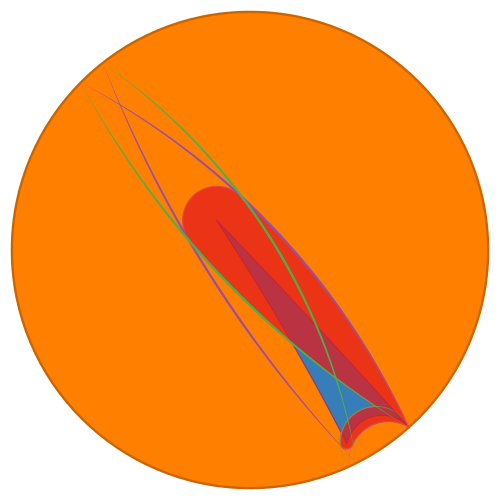

In [54]:
import random
import drawSvg as draw
from constructions import *
from deltaNeigbourhood import *
from hyperbolic.poincare.shapes import *
from Triangle import *

backgroundStyle = dict(stroke='#cc6500', stroke_width=0.01, fill='#ff7f00')
polyStyle1 = dict(stroke='#793e82', stroke_width=0.005,  fill='#377eb8', fill_opacity=1)
polyStyle2 = dict(stroke='#e94749', stroke_width=0.005, fill='#e41a1c', fill_opacity=0.75)
lineStyle1 = dict(hwidth=0.02, fill='#984ea3')
lineStyle2 = dict(hwidth=0.02, fill='#4daf4a')

d = draw.Drawing(2.1, 2.1, origin='center')
d.setRenderSize(500)
d.append(draw.Circle(0, 0, 1, **backgroundStyle))

PList=randomPoints(3,1)

#PList=[Point(-0.381, -0.06), Point(-0.13, 0.123), Point(-0.182, 0.23)]

k=random.randint(0,2)
#k=0
print('PList =', PList)
print('k =', k)

Tri=Triangle.fromVertices(PList)

delta = Tri.approx()
delta=0.3
d.draw(Tri, **polyStyle1)
d.draw(deltaNbh(Tri,delta,k),**polyStyle2)


for i,e in enumerate(Tri.edges):
    d.draw(Tri.offsetEdge(i, delta, False), **lineStyle1)

for i,e in enumerate(Tri.edges):
    d.draw(Tri.offsetEdge(i, delta, inner=True), **lineStyle2)


if Tri.isCCW():
    print('Tri is CCW')
else:
    print('Tri is CW')

if Tri.isDeltaslim(delta):
    print('Tri is delta-slim for delta =',delta)
else:
    print('Tri is not covered for delta =',delta)

#print(delta)
#print(np.log(1+2**0.5))
#d.savePng('triangleDeltaNbh.png')
d